# Predicting Heart Disease
### Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a mchine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**The following steps will be used:**
1. Define the problem
2. Get data
3. Evaluate
4. Features of the data
5. Modelling
6. Experimentation

## 1. Defining the Problem

In a statment,

> At what effectiveness can a machine predict whether or not a patient has heart disease based on the parameters?

## 2. Getting Data
The original data supplied to this model is found here: https://archive.ics.uci.edu/dataset/45/heart+disease

More data can be found here: https://archive.ics.uci.edu/

## 3. Evaluation

> A model that can predict heart disease in patients at a rate of 95% accuracy or higher during a proof of concept experiment will indicate worth of pursuit

## 4. Features the Model will Use for Prediction

To see a breakdown of the 14 features this model will use for prediction, visit this page here: https://archive.ics.uci.edu/dataset/45/heart+disease

## 5. Modelling

In [1]:
# Importing tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # rows, cols

(303, 14)

### Explore the data

Find out more about the data and become a subject-matter expert on the dataset

1. What question(s) are we trying to answer?
2. What kind of data do we have, and how can we work with the different types?
3. What's missing from the data?
4. Where are the outliers, and should we care about them?
5. Can we add, change, or remove features to get more out of the data?

In [3]:
# Data Exploration

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
len(df)

303

In [6]:
# missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

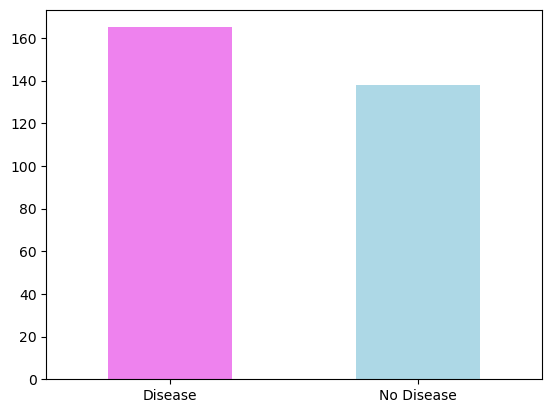

In [37]:
df["target"].value_counts().plot(kind="bar", color=["violet", "lightblue"]);
plt.xticks(rotation=0, ticks=[0,1], labels=['Disease', 'No Disease']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Comparing the target column to the sex column to look for 
# relationships or correlation
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


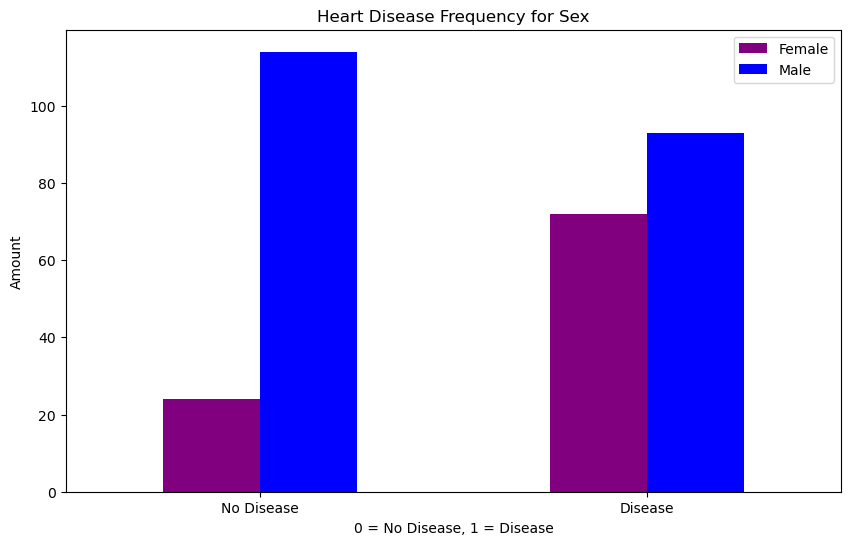

In [40]:
# plot of the above crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["purple", "blue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")

plt.legend(["Female", "Male"]);

plt.xticks(rotation=0, ticks=[0,1], labels=['No Disease', 'Disease']);


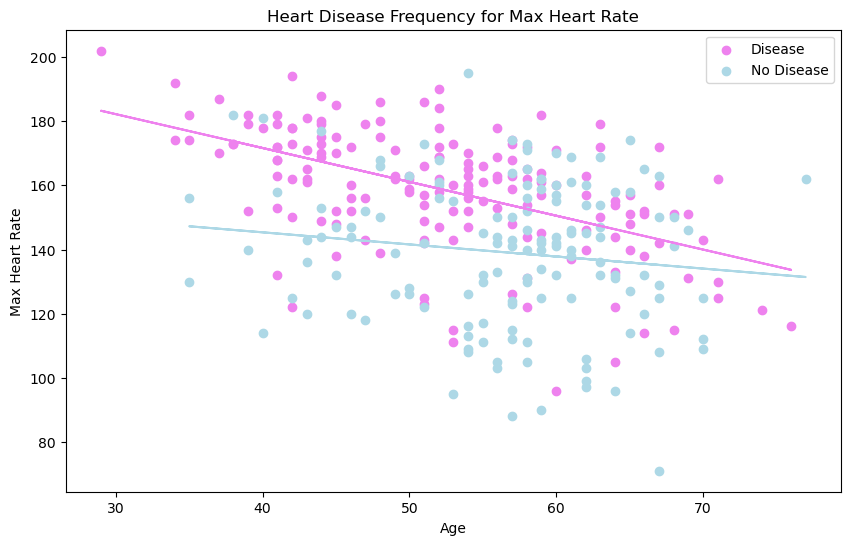

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="violet");

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

plt.title("Heart Disease Frequency for Max Heart Rate")
plt.ylabel("Max Heart Rate")
plt.xlabel("Age")


plt.legend(["Disease", "No Disease"]);

z = np.polyfit(df.age[df.target==0], df.thalach[df.target==0], 1)
p = np.poly1d(z)

plt.plot(df.age[df.target==0], p(df.age[df.target==0]), color="lightblue")

z = np.polyfit(df.age[df.target==1], df.thalach[df.target==1], 1)
p = np.poly1d(z)
plt.plot(df.age[df.target==1], p(df.age[df.target==1]), color="violet")

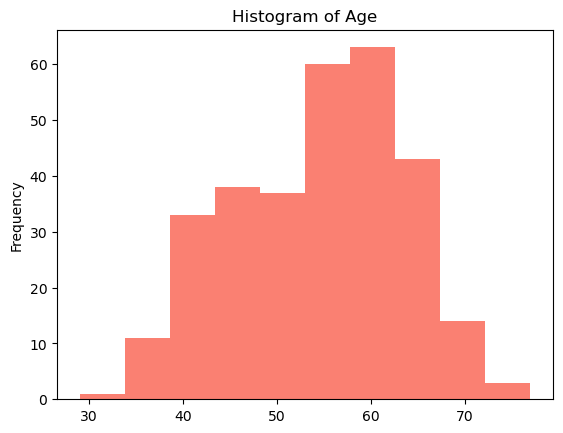

In [28]:
df.age.plot.hist(color="salmon", title="Histogram of Age");

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

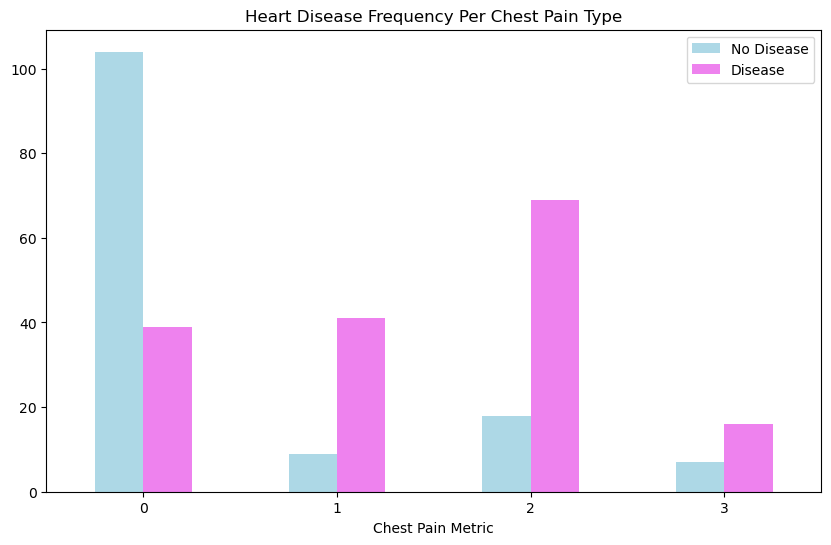

In [41]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue", "violet"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Metric")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)



In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


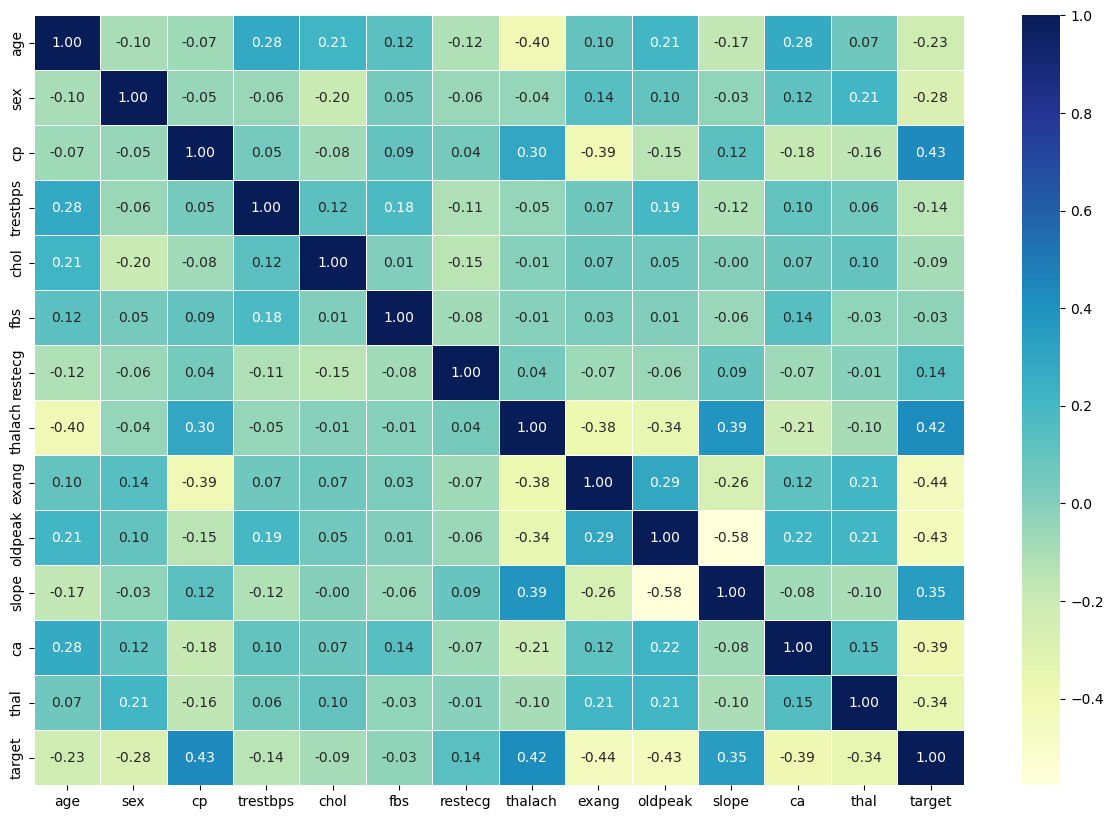

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

### Preparing the Data

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# split into X and y, train and test datasets

X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Trying out 3 different models:**
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

To make this easier we'll put the models in a dictionary that we can loop through as necessary

In [51]:
models = {"Logistic Regression": LogisticRegression(n_jobs=-1),
         "KNN": KNeighborsClassifier(n_jobs=-1),
         "Random Forest": RandomForestClassifier(n_jobs=-1)}

In [52]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dictionary of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    returns a dict of model scores
    '''
    np.random.seed(42)
    model_scores = {}  # keep model scores in dict
    for name, model in models.items():
        model.fit(X_train, y_train)  # fit the model
        model_scores[name] = model.score(X_test, y_test)  # score the model, append to scores
    return model_scores
        

In [62]:
baseline = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
baseline

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1

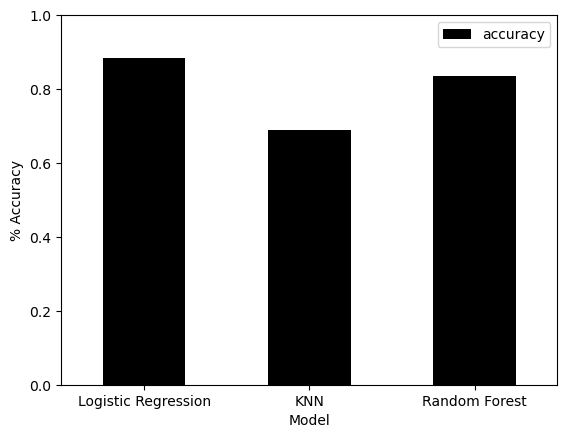

In [120]:
model_compare = pd.DataFrame(baseline, index=["accuracy"])
model_compare.T.plot(kind="bar", color=["black"]);
plt.xticks(rotation=0)
plt.ylabel("% Accuracy")
plt.xlabel("Model")
plt.yticks(np.arange(0, 1.2, 0.2));

### Tuning the Models

Examining the following parameters:
* Hyperparameters
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under curve (AUC)

### Tuning by Hand

In [65]:
# Tuning KNN, nearest neighbors, by hand

train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


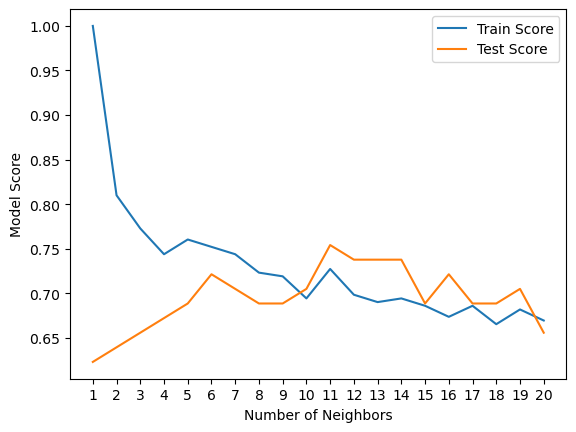

In [70]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


In [89]:
new = models.copy()

In [90]:
new['KNN'] = KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [91]:
new

{'Logistic Regression': LogisticRegression(n_jobs=-1),
 'KNN': KNeighborsClassifier(n_jobs=-1, n_neighbors=11),
 'Random Forest': RandomForestClassifier(n_jobs=-1)}

### Tuning with RandomizedSearchCV and GridSearchCV

More info for Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

More info for RandomForest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [93]:
# tuning Logistic Regression and RandomdForestClassifier

# grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

# grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
